In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 22.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 59.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 10.1 MB/s eta 0:00:00


In [30]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 19.3 MB/s eta 0:00:00
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 27.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 59.6 MB/s eta 0:00:00
     ━━━━

In [31]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [32]:
from catboost import CatBoostClassifier, Pool
import numpy as np
import pandas as pd
import warnings, random
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split

import os
from sklearn.preprocessing import LabelEncoder


In [33]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [34]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [35]:
# PRODUCT_ID, TIMESTAMP, Y_Quality , Y_Class feature 제거 
train_x = train_df.drop(columns=['PRODUCT_ID', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

# PRODUCT_ID, TIMESTAMP feature 제거 
test_x = test_df.drop(columns=['PRODUCT_ID'])

In [36]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [25]:
catboost = CatBoostClassifier(max_depth = 10,random_state=37).fit(train_x, train_y)
# mat_depth 파라미터를 기본값에서 10으로 변경 
print('Done.')

Learning rate set to 0.079629
0:	learn: 1.0435115	total: 1.74s	remaining: 28m 56s
1:	learn: 0.9978547	total: 3.49s	remaining: 29m 1s
2:	learn: 0.9594791	total: 5.18s	remaining: 28m 41s
3:	learn: 0.9263390	total: 6.9s	remaining: 28m 38s
4:	learn: 0.9005746	total: 8.63s	remaining: 28m 37s
5:	learn: 0.8780007	total: 10.4s	remaining: 28m 40s
6:	learn: 0.8584470	total: 10.8s	remaining: 25m 36s
7:	learn: 0.8394360	total: 12.6s	remaining: 26m 1s
8:	learn: 0.8242250	total: 14.3s	remaining: 26m 13s
9:	learn: 0.8111720	total: 16s	remaining: 26m 26s
10:	learn: 0.7968041	total: 17.8s	remaining: 26m 39s
11:	learn: 0.7853069	total: 19.5s	remaining: 26m 47s
12:	learn: 0.7765013	total: 21.3s	remaining: 26m 56s
13:	learn: 0.7661583	total: 23s	remaining: 27m 2s
14:	learn: 0.7570379	total: 24.8s	remaining: 27m 6s
15:	learn: 0.7494212	total: 26.5s	remaining: 27m 8s
16:	learn: 0.7395299	total: 28.2s	remaining: 27m 9s
17:	learn: 0.7320864	total: 29.9s	remaining: 27m 13s
18:	learn: 0.7244664	total: 31.7s	rem

In [26]:
preds_catboost = catboost.predict(test_x)
print('Done.')

Done.


In [27]:
submit = pd.read_csv('data/sample_submission.csv')

(array([ 33.,   0.,   0.,   0.,   0., 429.,   0.,   0.,   0.,  73.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

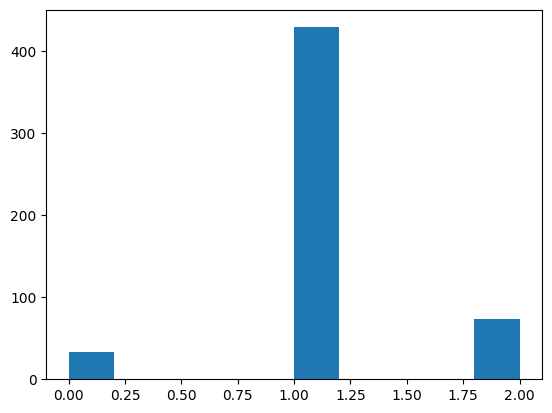

In [28]:
submit['Y_Class'] = preds_catboost
# 0,1,2 분포 간단히 확인 
plt.hist(preds_catboost)

In [29]:
submit.to_csv('./submission.csv', index=False)